In [1]:
from convokit import Corpus, Coordination, TextCleaner, TextParser, PolitenessStrategies
from scipy.stats import ttest_ind_from_stats
import numpy as np, pandas as pd, seaborn as sns, os, matplotlib.pyplot as plt, matplotlib.patches as mpatches

sns.set_theme("paper", font_scale=1.2)

In [2]:
path = os.getcwd()[:-8]
corpus_name = "corpus"
min_lines = 0

corpus = Corpus(f'{path}data/processed/{corpus_name}') #merge_lines = True)
corpus = corpus.filter_conversations_by(lambda convo: len(convo._utterance_ids) > min_lines )
cleaner = TextCleaner(verbosity=1000)
corpus = cleaner.transform(corpus)

1000/5539 utterances processed
2000/5539 utterances processed
3000/5539 utterances processed
4000/5539 utterances processed
5000/5539 utterances processed
5539/5539 utterances processed


# Politeness 

In [3]:
# https://github.com/CornellNLP/ConvoKit/blob/master/examples/conversations-gone-awry/Conversations_Gone_Awry_Prediction.ipynb
tp = TextParser()
tp.fit(corpus)
tp.transform(corpus);

In [4]:
ps = PolitenessStrategies(verbose=1000)
corpus = ps.transform(corpus)
rows = [ utt.meta["politeness_strategies"] for utt in corpus.iter_utterances() ]
politeness_strategies = pd.DataFrame(rows, index=corpus.get_utterance_ids())

1000/5539 utterances processed
2000/5539 utterances processed
3000/5539 utterances processed
4000/5539 utterances processed
5000/5539 utterances processed


#Introductions


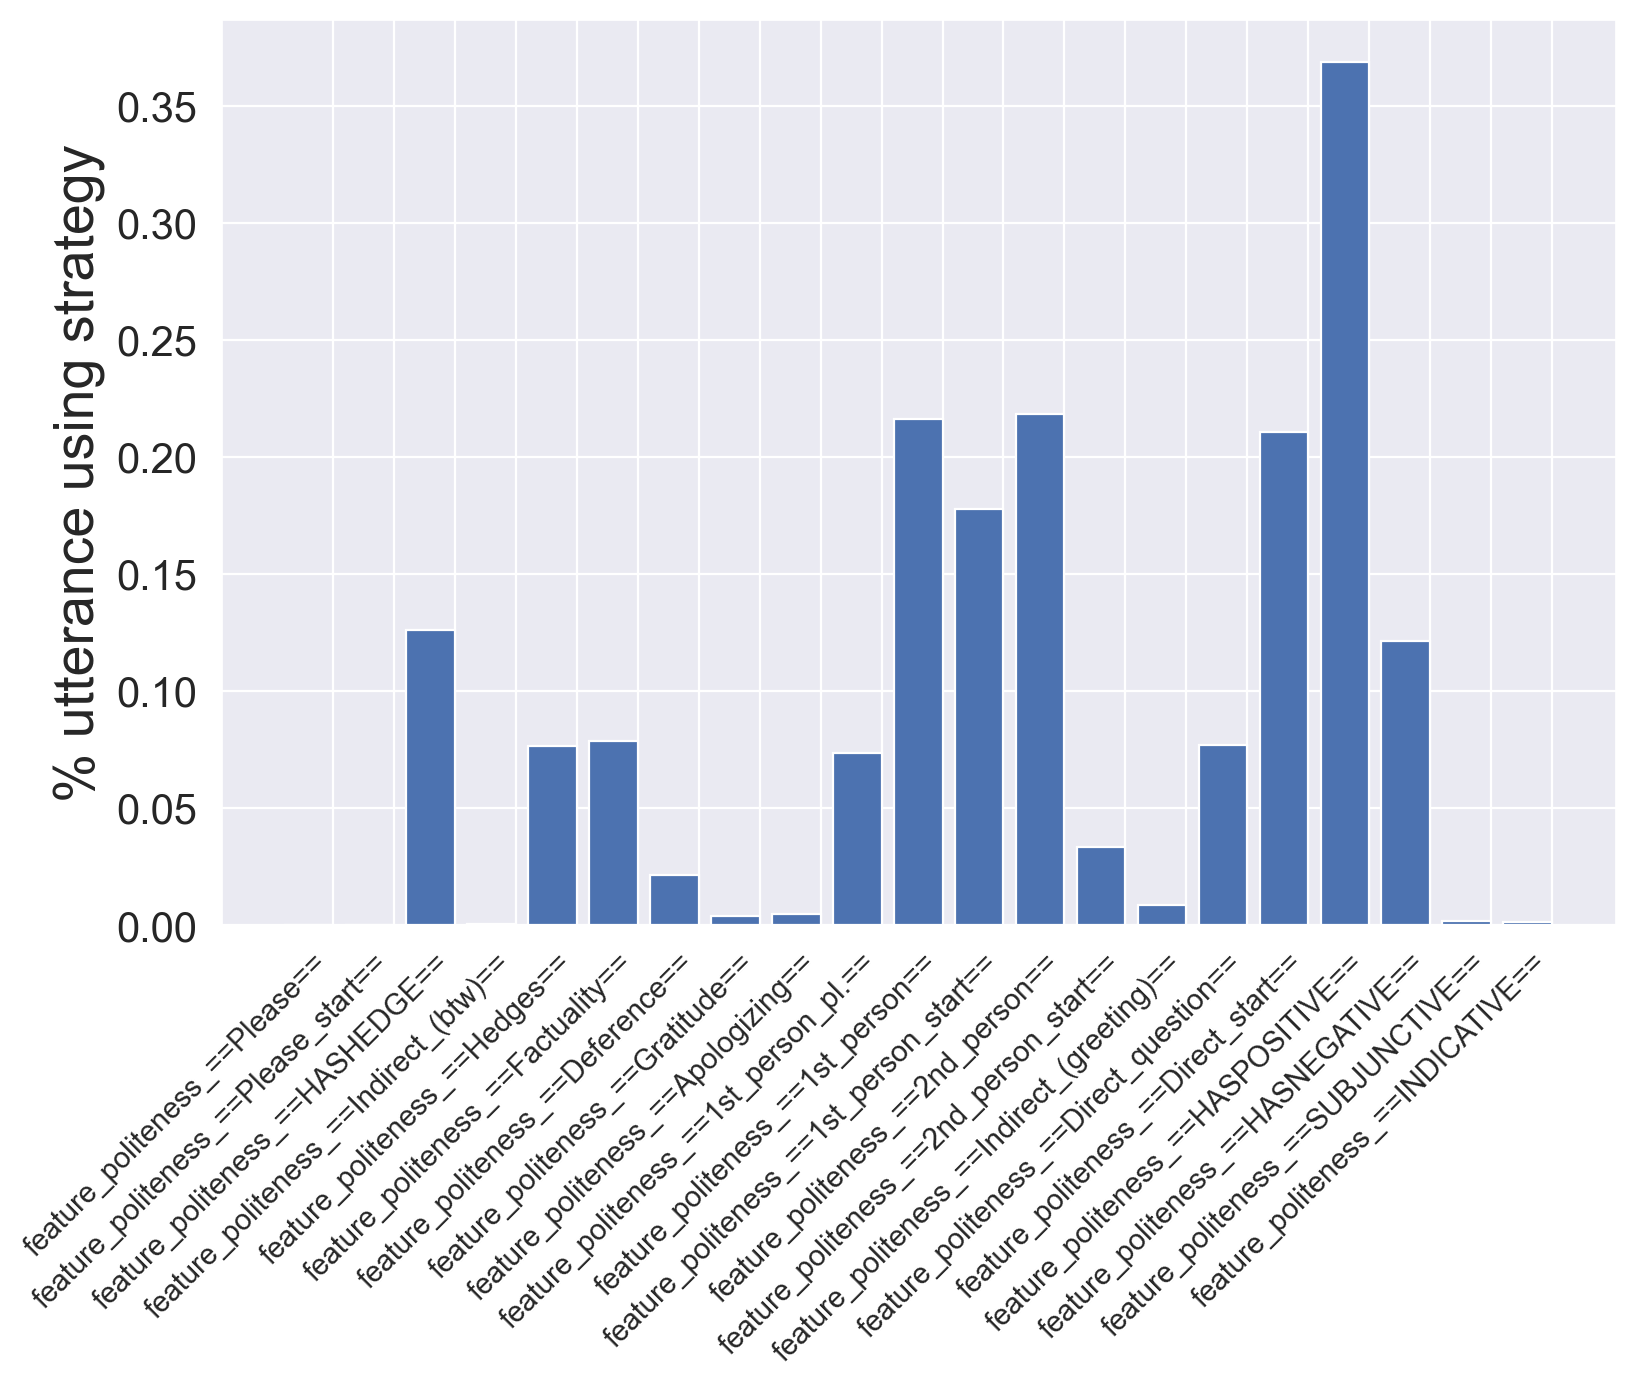

#Negotiations


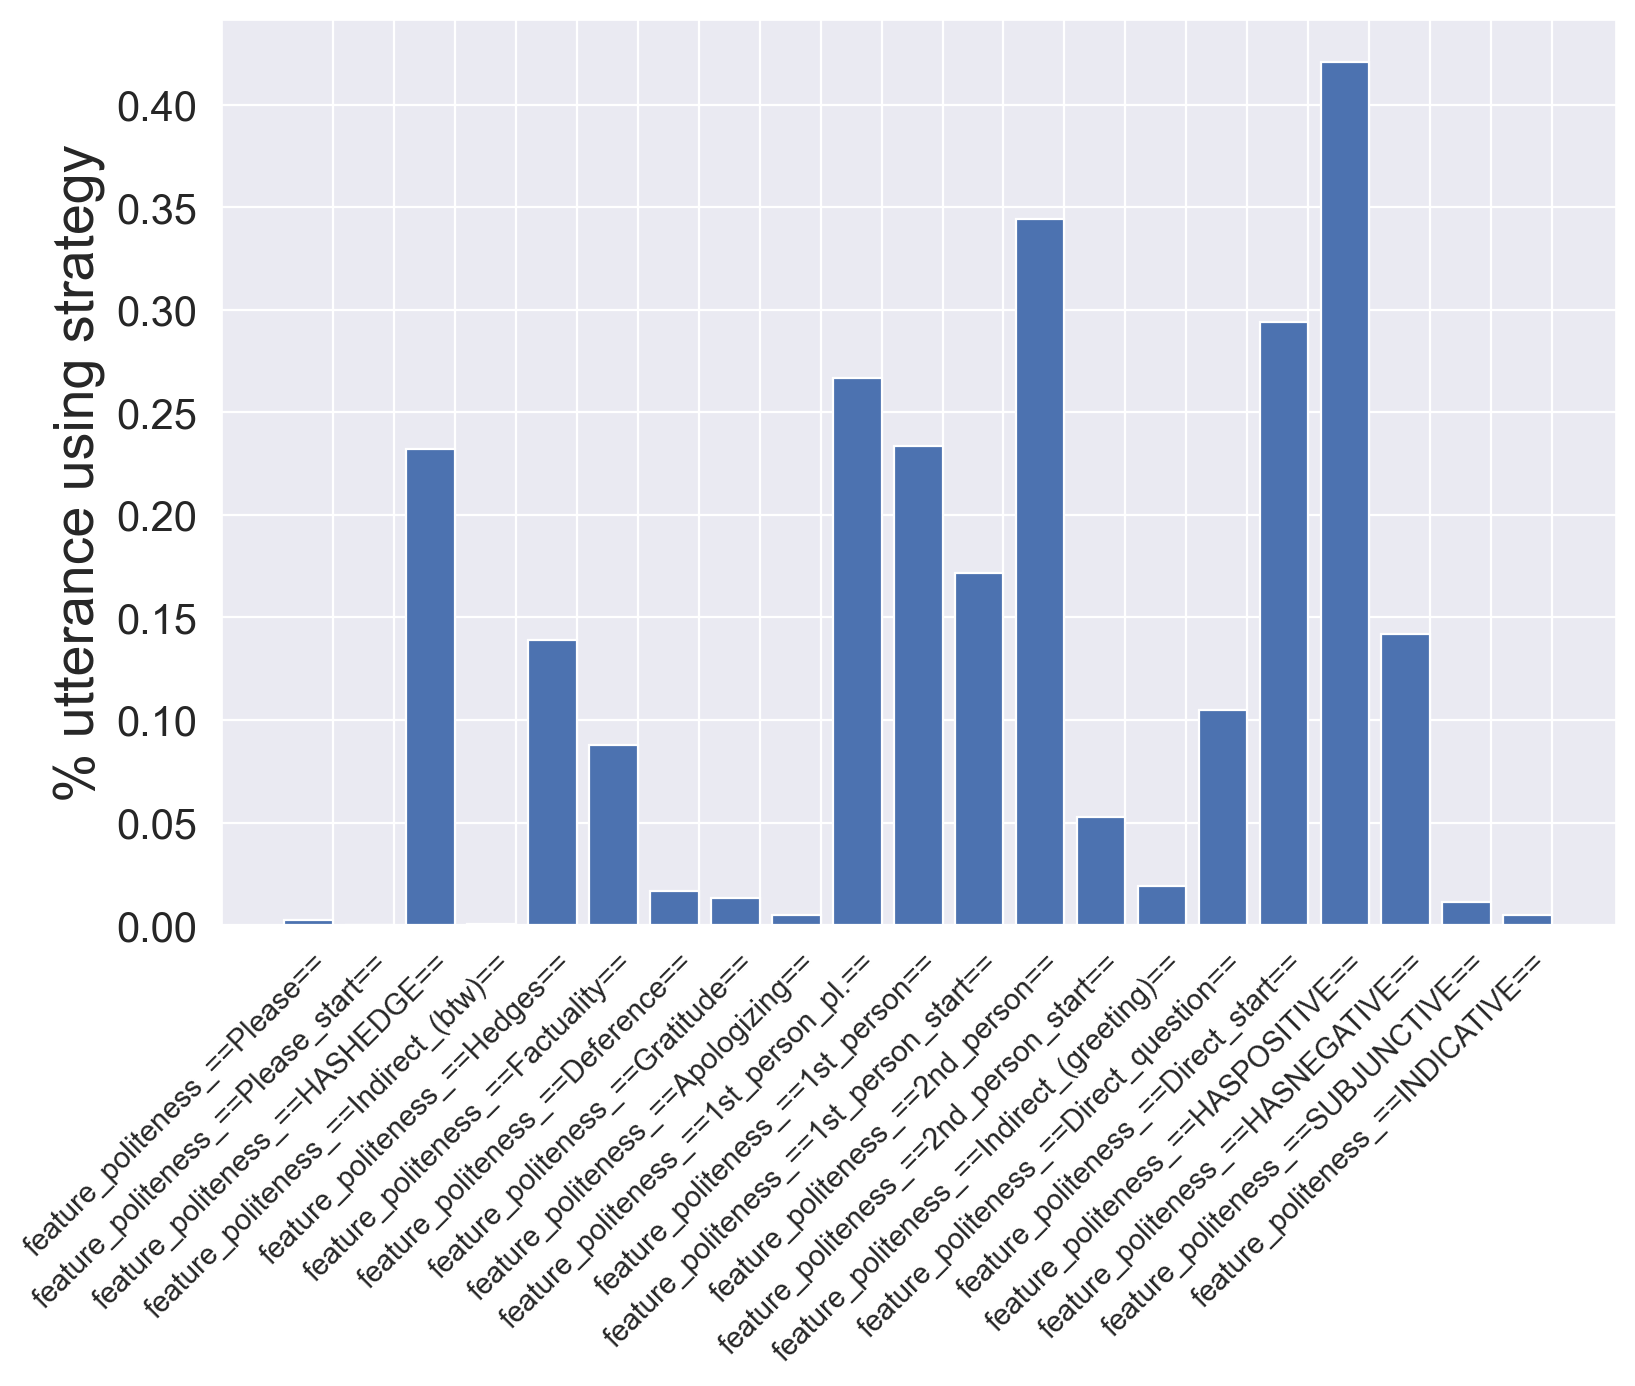

In [5]:
intros = lambda utt: utt.conversation_id.startswith("intro")
negos = lambda utt: utt.conversation_id.startswith("nego")
print("#Introductions")
ps.summarize(corpus, intros, plot=True)
print("#Negotiations")
ps.summarize(corpus, negos, plot=True);